## Mini Project III - Exploratory Data Analysis

### <u> NOTES </u>
- first 8 of acct_nbr are uniform.
- acct_nbr contains no duplicates
- one years worth of transactions
- 33 states, 69 cities
- Investigate clustering by 1st postal code
- Take absolute value when comparing transaction sum

### <u> CODES </u>

Transactions:
-    IN - interest
-    PM - loan payment
-    WD - withdraw
-    DP - deposit
-    IQ - inquiry (credit bureau)

Marriage:
* 1 = single
* 2 = married
* 3 = ~seperated 
* 4 = ~divorced 

In [2]:
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# root dfs
cust = pd.read_feather('created_data/customer.feather')
acc = pd.read_feather('created_data/account.feather')
tran = pd.read_feather('created_data/transactions.feather')


#account info
acc_cheq = pd.read_feather('created_data/account_checking.feather')
acc_cred = pd.read_feather('created_data/account_credit.feather')
acc_save = pd.read_feather('created_data/account_saving.feather')

#transaction info
tran_cheq = pd.read_feather('created_data/transaction_checking.feather')
tran_cred = pd.read_feather('created_data/transaction_credit.feather')
tran_save = pd.read_feather('created_data/transaction_saving.feather')


num of children and marital status = highest corr

marital status and age, then income and num of children follow.

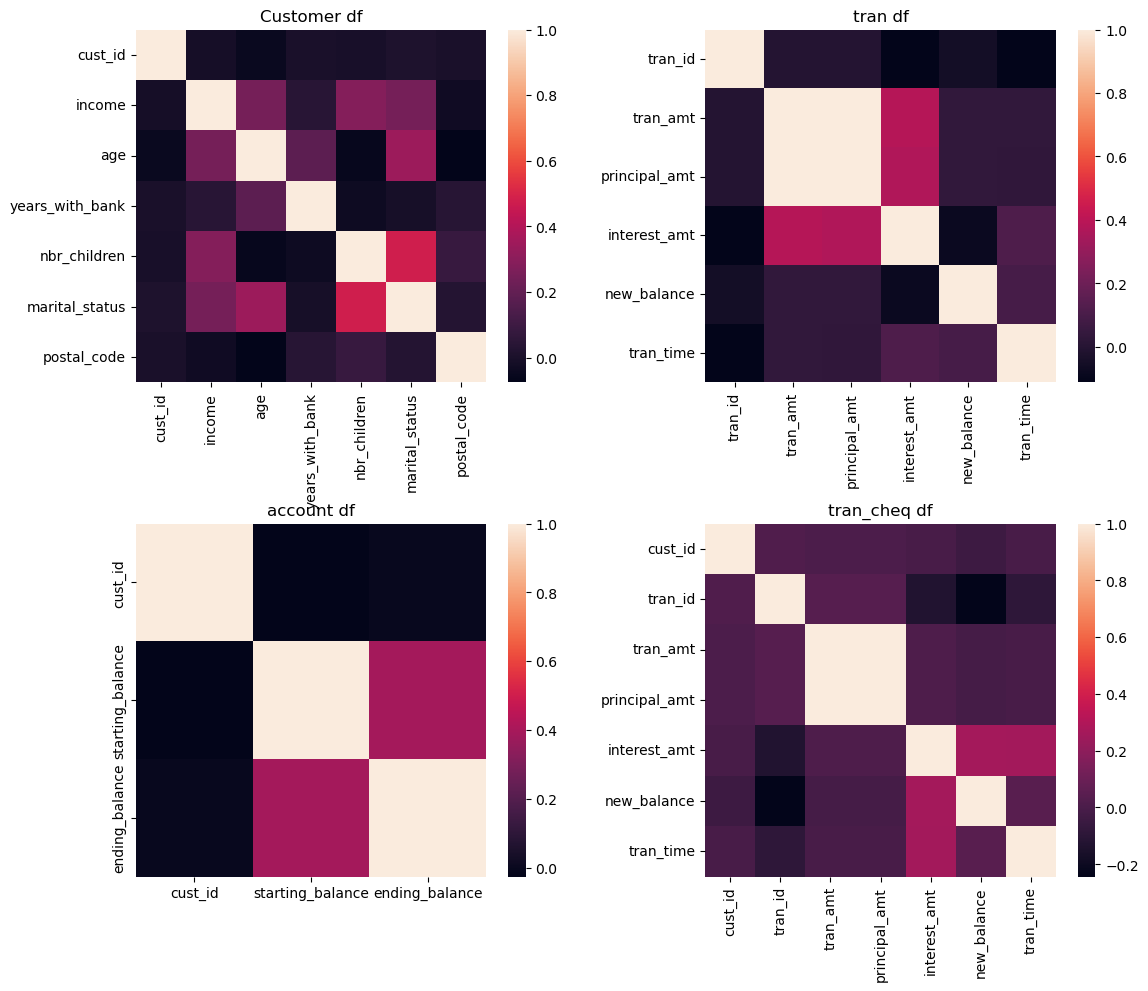

In [42]:
fig, axes = plt.subplots(2,2,figsize=(13,11))
sns.heatmap(cust.corr(),ax=axes[0,0])
axes[0,0].set_title('Customer df')
sns.heatmap(tran.corr(),ax=axes[0,1])
axes[0,1].set_title('tran df')
sns.heatmap(acc.corr(),ax=axes[1,0])
axes[1,0].set_title('account df')
sns.heatmap(tran_cheq.corr(),ax=axes[1,1])
axes[1,1].set_title('tran_cheq df')

plt.subplots_adjust(hspace=0.4, wspace=0.3)